In [2]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [3]:
#Step 1 Load Data
time_horizon = 5
# X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 5, True)
# X_train, y_train, X_test, y_test = lstm.load_data('btc_open.csv', time_horizon, True) #YES!
# X_train, y_train, X_test, y_test = lstm.load_data('tsla_close.csv', time_horizon, True)
X_train, y_train, X_test, y_test = lstm.load_data('../../data/files/aapl_open.csv', time_horizon, True)

In [4]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=100,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.020387887954711914


In [5]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=100,
    validation_split=0.20)

Train on 2221 samples, validate on 556 samples
Epoch 1/100
2221/2221 [==============================] - 2s 931us/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2/100
2221/2221 [==============================] - 0s 164us/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/100
2221/2221 [==============================] - 0s 173us/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/100
2221/2221 [==============================] - 0s 149us/step - loss: 0.0012 - val_loss: 9.8156e-04
Epoch 5/100
2221/2221 [==============================] - 0s 164us/step - loss: 0.0010 - val_loss: 7.8847e-04
Epoch 6/100
2221/2221 [==============================] - 0s 171us/step - loss: 8.6962e-04 - val_loss: 7.9333e-04
Epoch 7/100
2221/2221 [==============================] - 0s 154us/step - loss: 8.7955e-04 - val_loss: 7.8598e-04
Epoch 8/100
2221/2221 [==============================] - 0s 165us/step - loss: 8.6687e-04 - val_loss: 7.3474e-04
Epoch 9/100
2221/2221 [==============================] - 0s 164us/step - loss: 8.

Epoch 73/100
2221/2221 [==============================] - 0s 159us/step - loss: 4.7644e-04 - val_loss: 4.0021e-04
Epoch 74/100
2221/2221 [==============================] - 0s 192us/step - loss: 4.7673e-04 - val_loss: 4.0427e-04
Epoch 75/100
2221/2221 [==============================] - 0s 148us/step - loss: 4.7336e-04 - val_loss: 4.0240e-04
Epoch 76/100
2221/2221 [==============================] - 0s 155us/step - loss: 4.8356e-04 - val_loss: 3.9659e-04
Epoch 77/100
2221/2221 [==============================] - 0s 145us/step - loss: 4.7801e-04 - val_loss: 4.0493e-04
Epoch 78/100
2221/2221 [==============================] - 0s 164us/step - loss: 4.8304e-04 - val_loss: 4.0541e-04
Epoch 79/100
2221/2221 [==============================] - 0s 153us/step - loss: 4.7877e-04 - val_loss: 4.0424e-04
Epoch 80/100
2221/2221 [==============================] - 0s 158us/step - loss: 4.8087e-04 - val_loss: 3.9814e-04
Epoch 81/100
2221/2221 [==============================] - 0s 155us/step - loss: 4.7266e-

61.8 61
yo


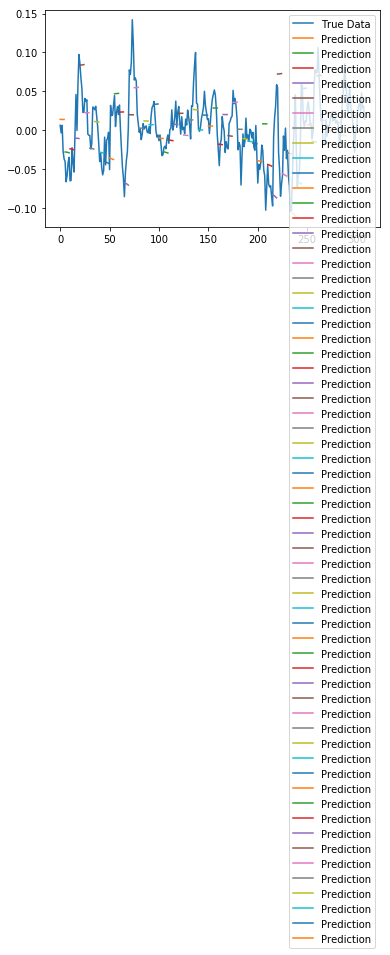

In [6]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, time_horizon, time_horizon)
lstm.plot_results_multiple(predictions, y_test, time_horizon)

In [51]:
# model.save('good_model.h5')

# Making Prediction for next timestep

1.0 1
yo


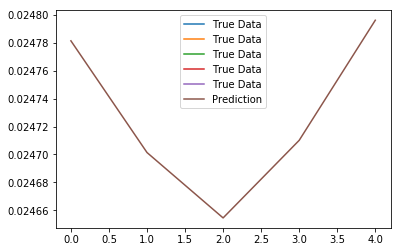

In [7]:
predictions_r = lstm.predict_sequences_multiple(model, X_test[-6:-1], time_horizon, time_horizon)
lstm.plot_results_multiple(predictions_r, predictions_r, time_horizon)